In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/GDToT/Art Garfunkel Library001.csv")
data

,Date Read,Author,Books,Year Published,Pages,Favorite
0,Jun-68,Jean-Jacques Rousseau,The Confessions,1781,606,1
1,Jun-68,Erich Fromm,The Art of Loving,1956,146,1
2,Jun-68,Mark Twain,The Adventures of Huckleberry Finn,1884,288,0
3,Jul-68,James Thurber,My Life and Hard Times,1933,115,0
4,Jul-68,William Shakespeare,Romeo and Juliet,1596,146,0
...,...,...,...,...,...,...
1315,Dec-21,Amor Towles,A Gentleman in Moscow,2016,462,0
1316,Dec-21,Mel Brooks,All About Me!,2021,480,0
1317,Jan-22,James Michener,Caravans,1963,320,0
1318,Jan-22,Abraham Lincoln,The Spiritual Growth of a Public Man,1973,47,0


In [ ]:
data['Year Published'].value_counts()

1988    21
1976    20
1980    20
1985    18
1974    17
        ..
1678     1
1490     1
1180     1
1834     1
1775     1
Name: Year Published, Length: 326, dtype: int64

In [ ]:
data.shape

(1320, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date Read       1320 non-null   object
 1   Author          1320 non-null   object
 2   Books           1320 non-null   object
 3   Year Published  1320 non-null   int64 
 4   Pages           1320 non-null   int64 
 5   Favorite        1320 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 62.0+ KB


In [ ]:

data=data.drop(['Date Read','Author','Books'],axis=1)

In [ ]:
data.isnull()

,Year Published,Pages,Favorite
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1315,False,False,False
1316,False,False,False
1317,False,False,False
1318,False,False,False


In [ ]:
data.isna().sum()

Year Published    0
Pages             0
Favorite          0
dtype: int64

In [ ]:
data.describe()

,Year Published,Pages,Favorite
count,1320.000000,1320.000000,1320.000000
mean,1867.958333,313.109848,0.103030
std,326.478110,191.219654,0.304114
min,5.000000,13.000000,0.000000
25%,1900.000000,180.000000,0.000000
50%,1963.000000,275.000000,0.000000
75%,1987.000000,386.250000,0.000000
max,2021.000000,1664.000000,1.000000


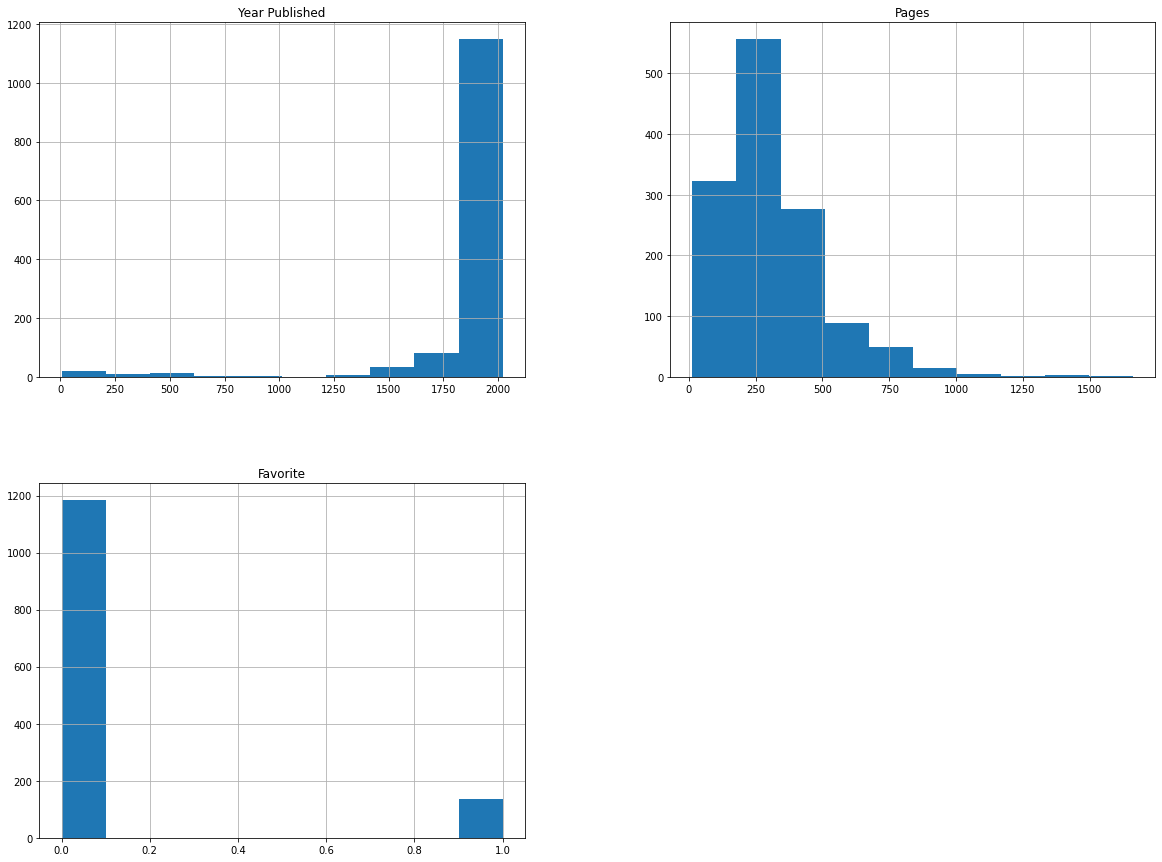

In [ ]:
freqgraph=data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

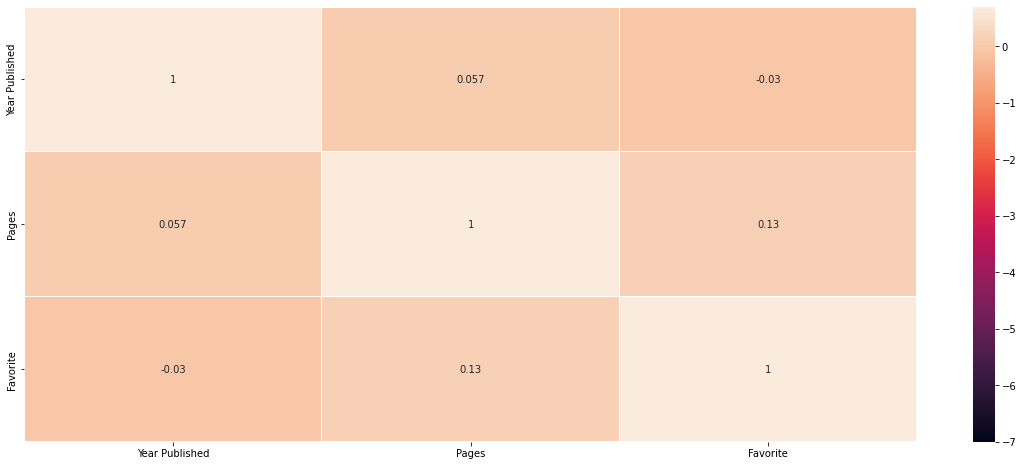

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-7,vmax=0.7,annot=True,linewidths=0.2)

In [ ]:
data.columns

Index(['Year Published', 'Pages', 'Favorite'], dtype='object')

In [ ]:
y=data['Favorite']
x=data.drop(['Favorite'],axis=1)

In [ ]:
x.shape

(1320, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [ ]:
model=lr.fit(x_train,y_train)

In [ ]:
predictions=model.predict(x_test)

In [ ]:
predictions

array([0.15875518, 0.10485168, 0.06607128, 0.07269492, 0.08665553,
       0.17018253, 0.06390637, 0.06572294, 0.12929862, 0.09169988,
       0.0647993 , 0.11590448, 0.06523844, 0.12040519, 0.1183245 ,
       0.09765031, 0.24123919, 0.05980594, 0.1240616 , 0.0613058 ,
       0.0395122 , 0.07011876, 0.06181602, 0.13670778, 0.07633482,
       0.16035006, 0.10133752, 0.05185707, 0.08397974, 0.06551402,
       0.0531821 , 0.06725472, 0.12826673, 0.08737072, 0.12021693,
       0.09843103, 0.08230834, 0.1243    , 0.06861336, 0.08941929,
       0.12093212, 0.08819389, 0.0987022 , 0.05847321, 0.06269636,
       0.05407015, 0.12418235, 0.09588125, 0.1033122 , 0.05361007,
       0.09239573, 0.07735525, 0.12752647, 0.06506624, 0.07584065,
       0.14116295, 0.09657973, 0.05012849, 0.08409457, 0.08665909,
       0.15188657, 0.20589015, 0.09755838, 0.08997636, 0.17673378,
       0.12960012, 0.08206093, 0.09472908, 0.10476192, 0.12296464,
       0.03278809, 0.17798395, 0.09351513, 0.04430078, 0.05338

In [ ]:
y_test

678     1
693     0
610     0
49      0
1291    0
       ..
178     0
287     0
1272    0
1099    0
294     0
Name: Favorite, Length: 330, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.09360977181988321
